In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
path = '/home/oem/Work_folder/NIR/'
name = 'resnet_all_res.csv'
file = pd.read_csv(os.path.join(path, name), sep=',')
file.head()

,freeze_mode,lr,exp,train_mode,epoch,loss,prec,recall
0,False,0.01,0,train,0,0.056496,0.580427,0.597428
1,False,0.01,0,valid,0,1.045165,0.550000,0.508333
2,False,0.01,0,train,1,0.147512,0.702267,0.693330
3,False,0.01,0,valid,1,0.875733,0.415000,0.403333
4,False,0.01,0,train,2,0.016722,0.703357,0.697254


In [8]:
file.columns

Index(['freeze_mode', 'lr', 'exp', 'train_mode', 'epoch', 'loss', 'prec',
       'recall'],
      dtype='object')

In [15]:
file.freeze_mode

array([False,  True])

In [22]:
file.shape


(720, 8)

In [30]:
temp_data = file[file['freeze_mode']==False][file['lr']==0.01][file['train_mode']=='valid']
a = temp_data.iloc[:temp_data.shape[0]//2, :]

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [2]:
def plot_graph(data, train_mode='valid'):
    for fr in np.unique(data.freeze_mode):
        for l in np.unique(data.lr):
            temp_data = data[data['freeze_mode']==fr][data['lr']==l][data['train_mode']==train_mode]
            mask_data = temp_data.iloc[:temp_data.shape[0]//2, :]
            non_mask_data = temp_data.iloc[temp_data.shape[0]//2:, :]
            for d in [mask_data, non_mask_data]:
                for metric in ['loss', 'prec', 'recall']:
                    mean_value = np.array([np.mean(d[d['epoch']==ep][metric]) for ep in np.unique(d.epoch)])
                    plt.figure(figsize=(10,10))
                    plt.plot(mean_value)
                    plt.title('Заморозка слоёв {}, шаг {}, метрика {}'.format(fr, l, metric))
                    plt.show()
                    
mask_use = {0: True, 1:False}
def plot_graph_metric(data, train_mode='valid', metric=['loss', 'prec', 'recall']):
    plt.figure(figsize=(10,10))
    legend = []
    for fr in np.unique(data.freeze_mode):
        for l in np.unique(data.lr):
            temp_data = data[data['freeze_mode']==fr][data['lr']==l][data['train_mode']==train_mode]
            mask_data = temp_data.iloc[:temp_data.shape[0]//2, :]
            non_mask_data = temp_data.iloc[temp_data.shape[0]//2:, :]
            for i, d in enumerate([mask_data, non_mask_data]):
                legend.append('Заморозка {}, использование масок {}, шаг {}'.format(fr, mask_use[i], l))
                for m in metric:
                    mean_value = np.array([np.mean(d[d['epoch']==ep][m]) for ep in np.unique(d.epoch)])
                    plt.plot(mean_value)
    plt.legend(legend,loc='upper left')
    plt.title('Метрика {}, кол-во экспериментов {}'.format('loss', len(np.unique(data['exp']))))

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


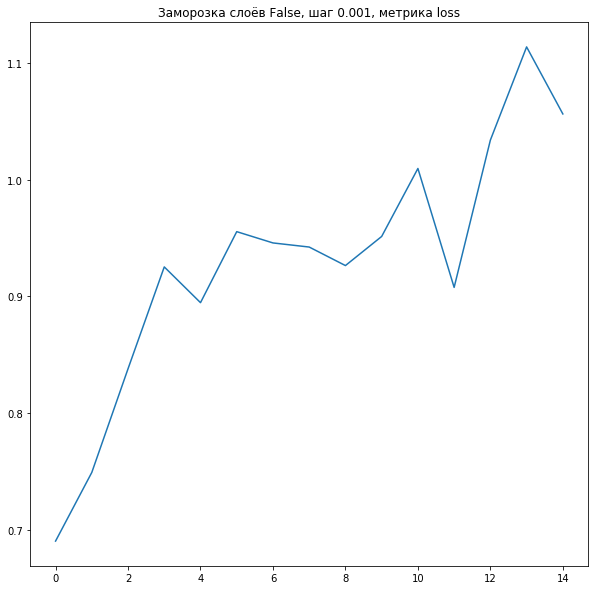

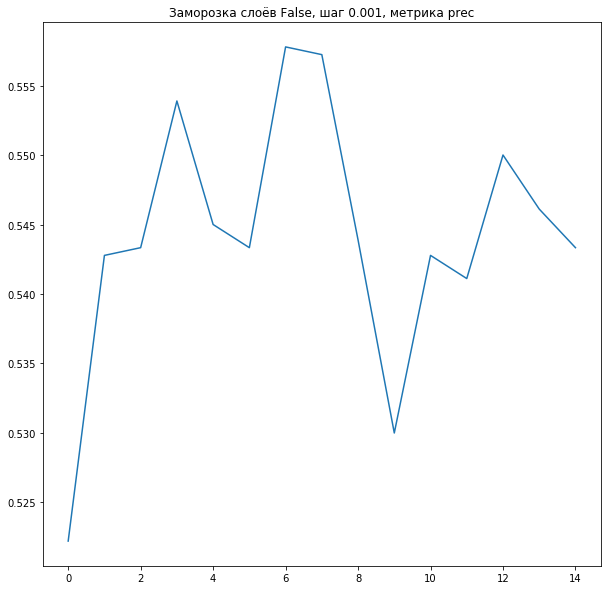

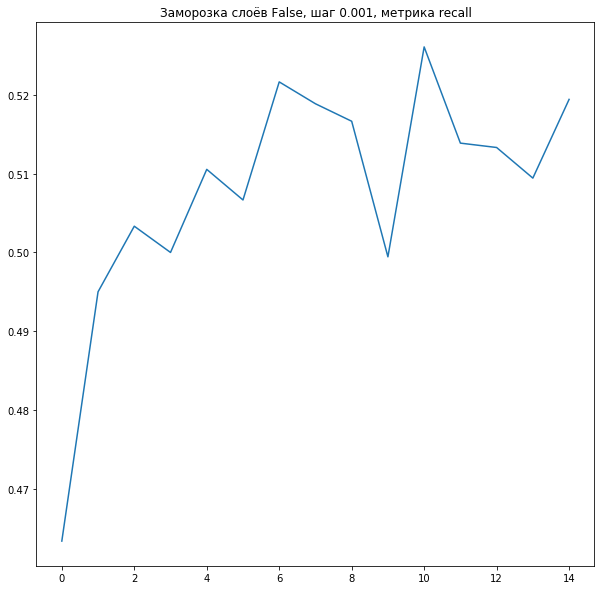

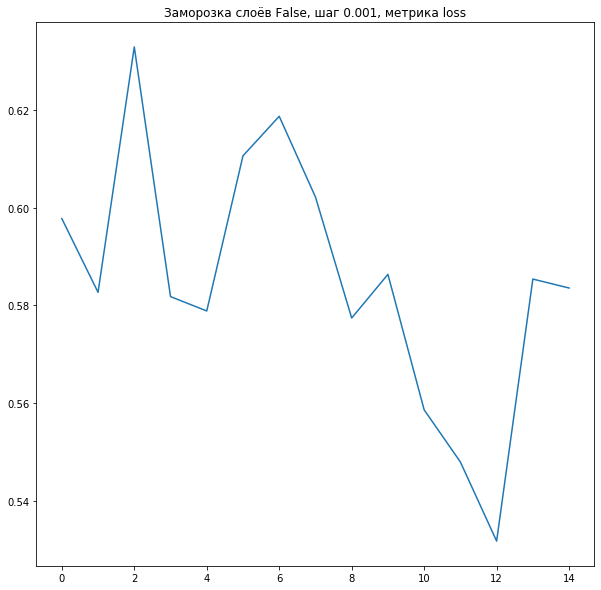

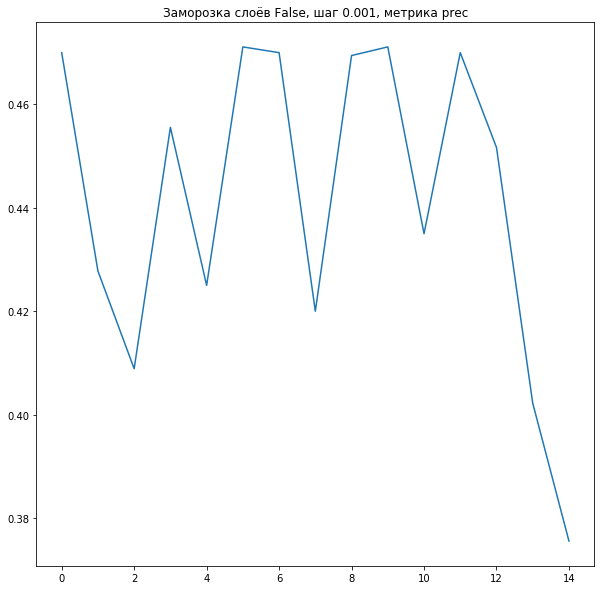

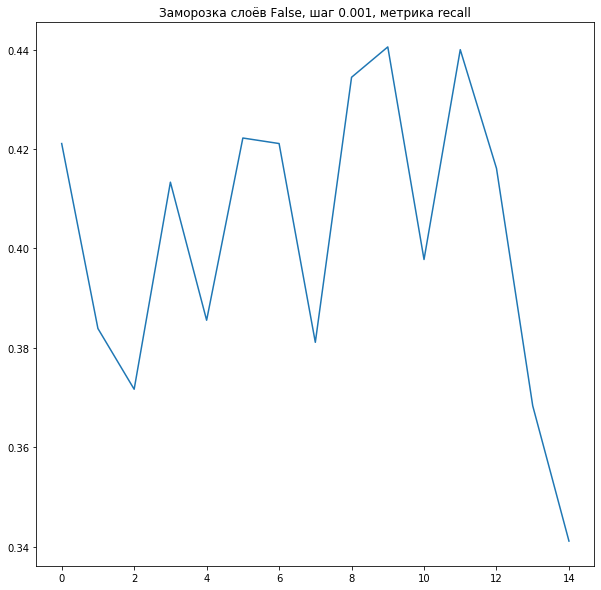

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


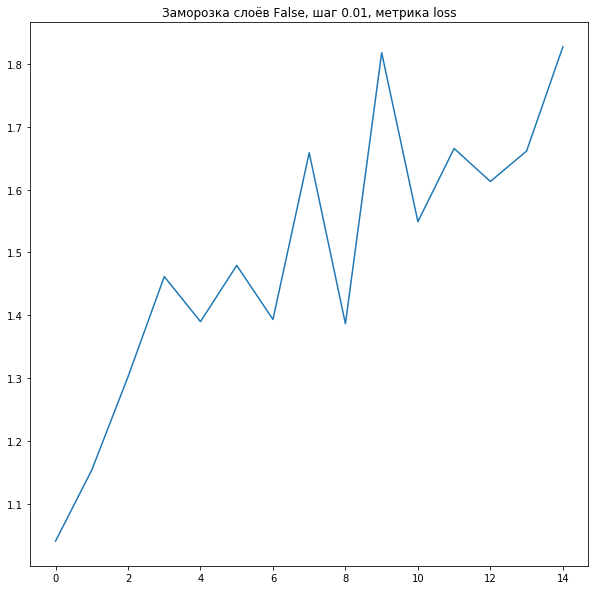

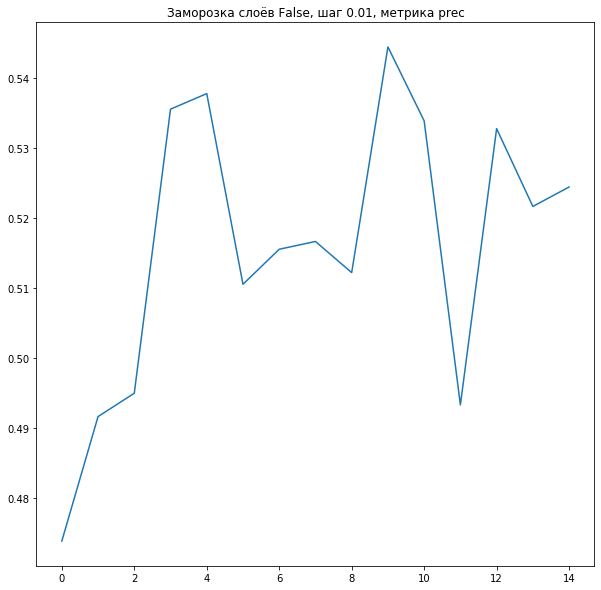

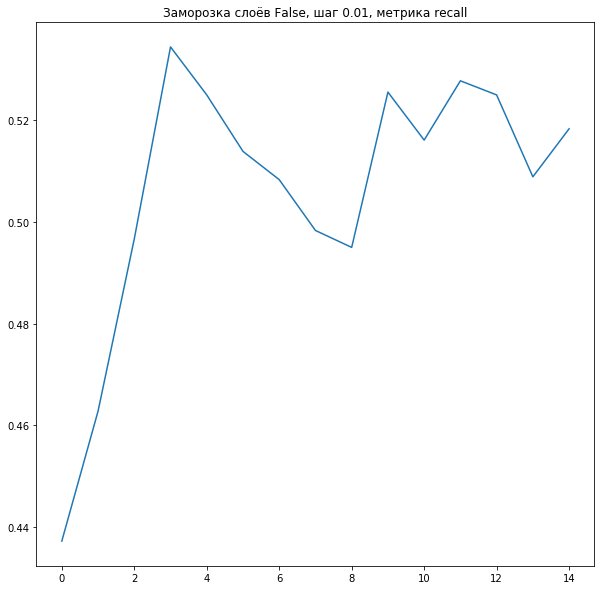

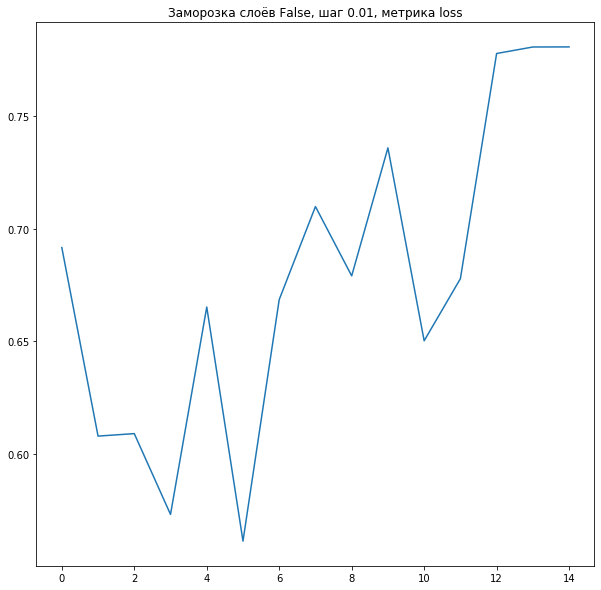

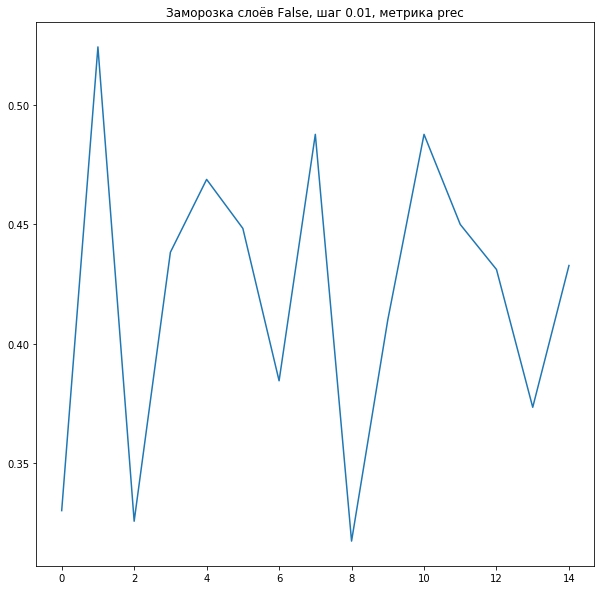

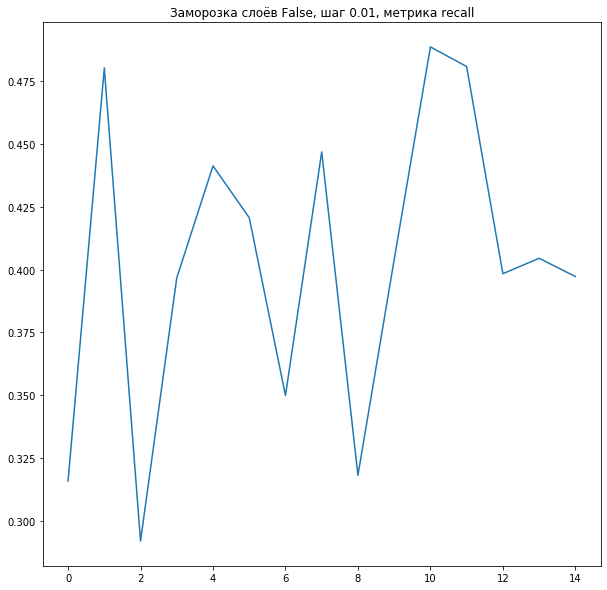

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


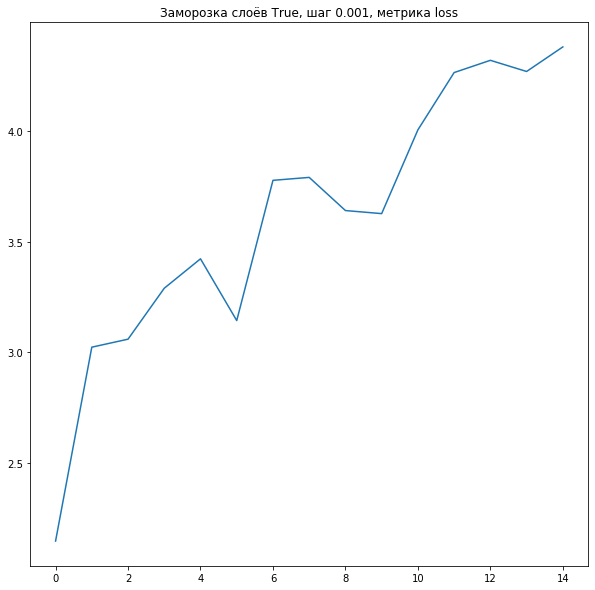

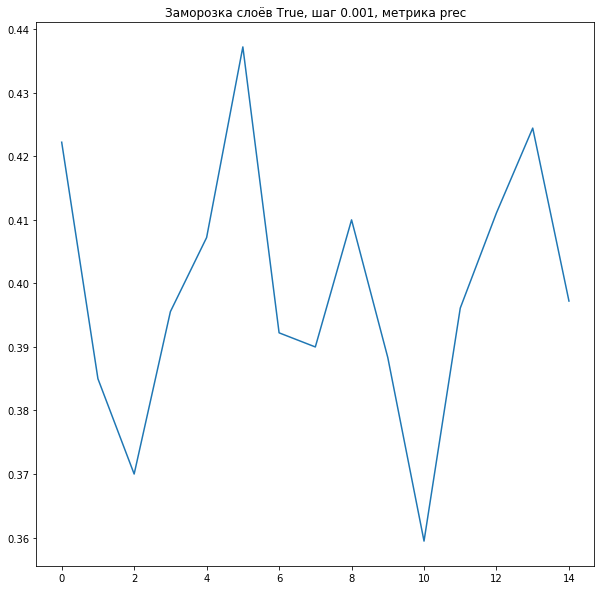

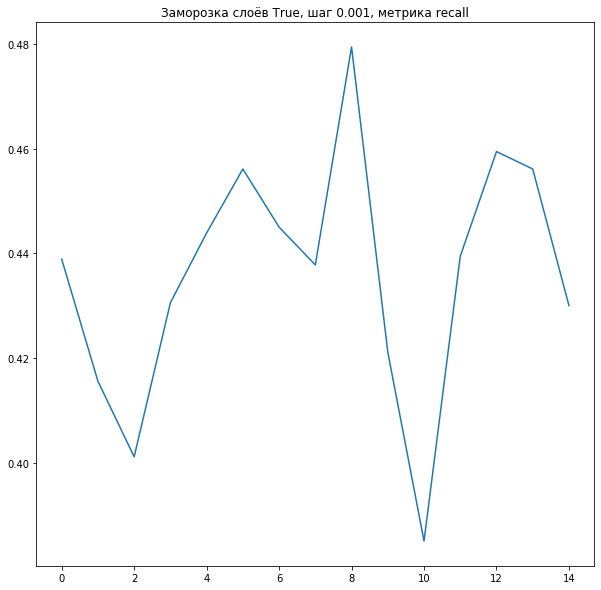

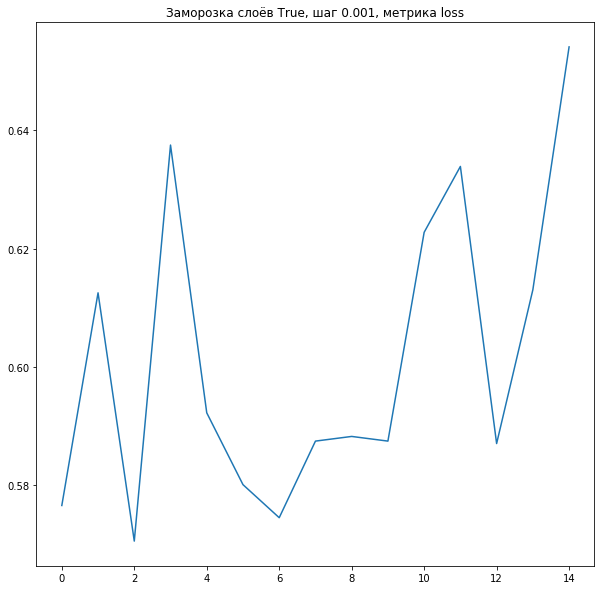

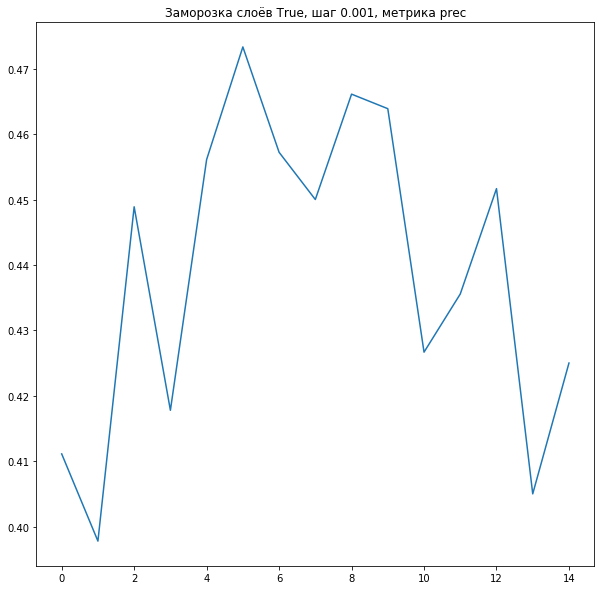

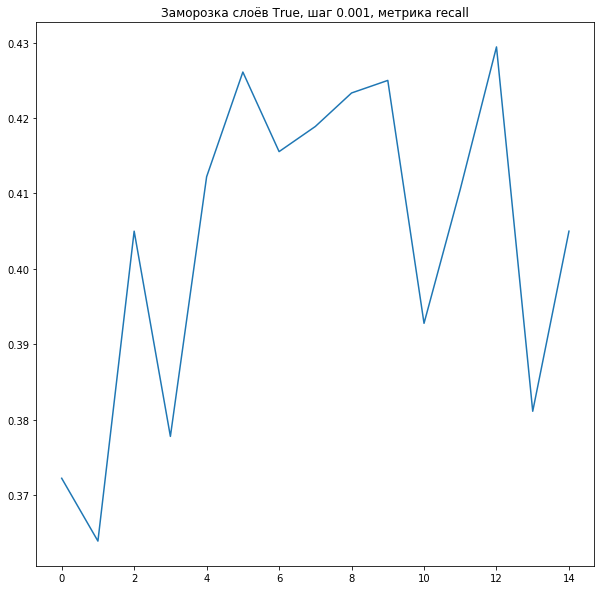

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


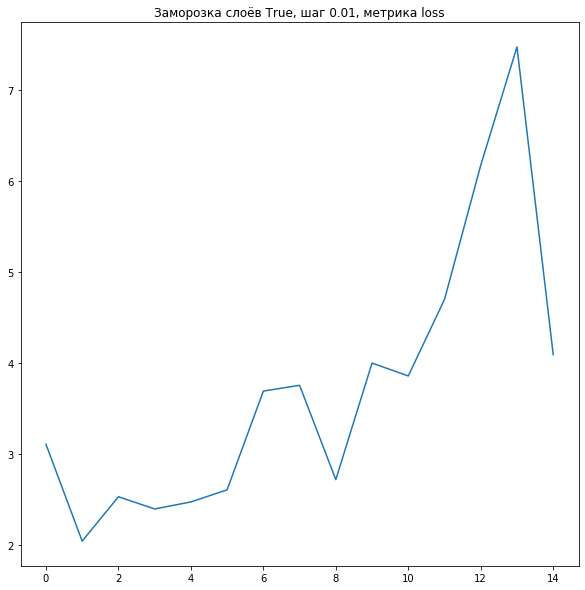

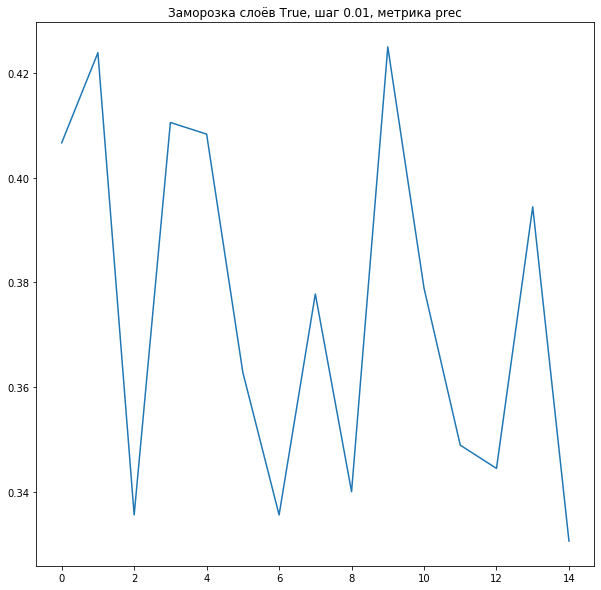

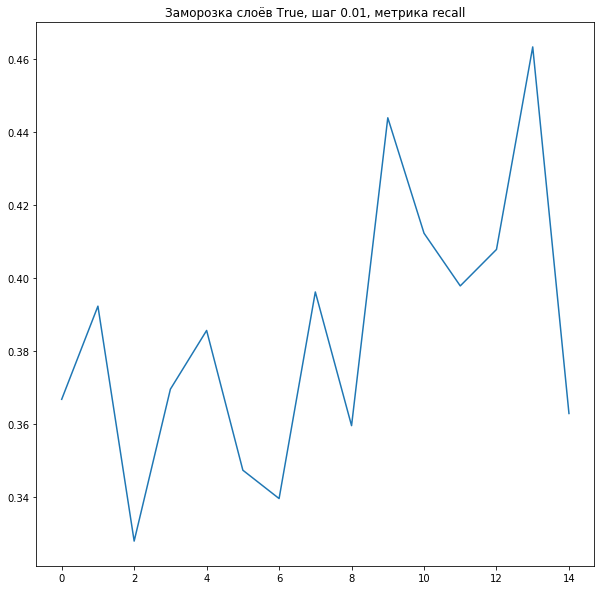

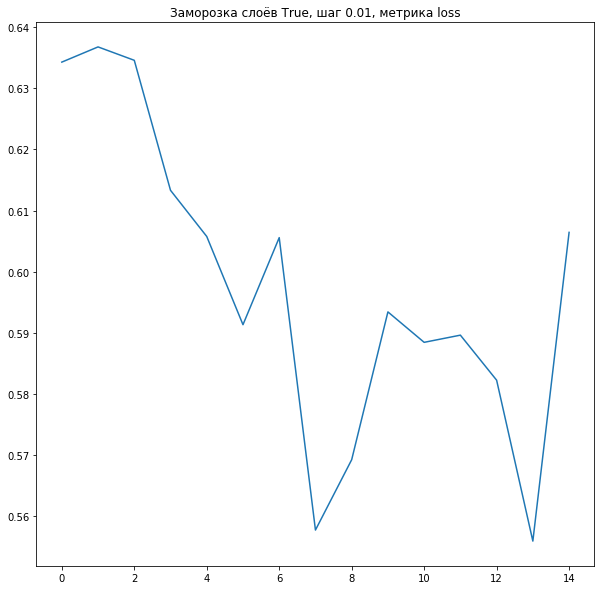

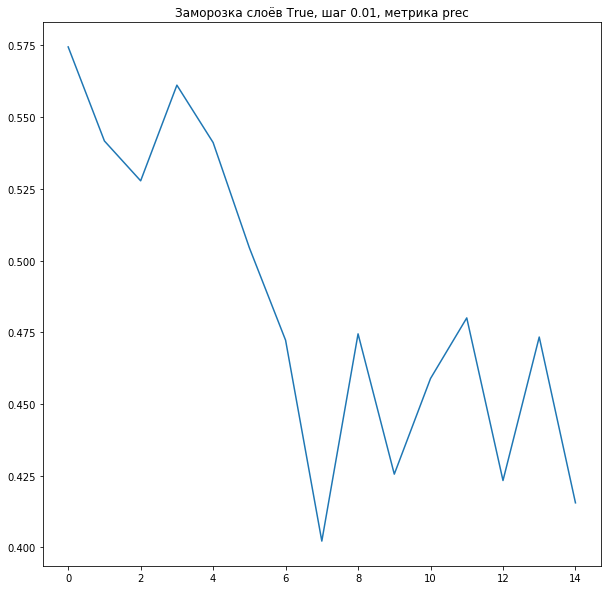

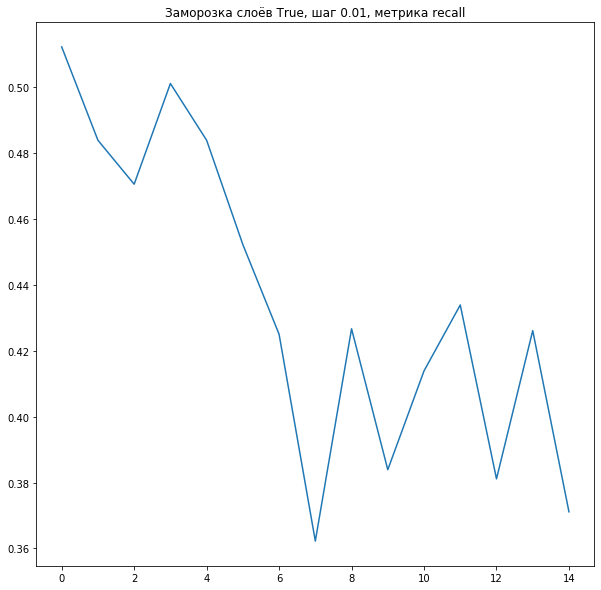

In [53]:
plot_graph(file)

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


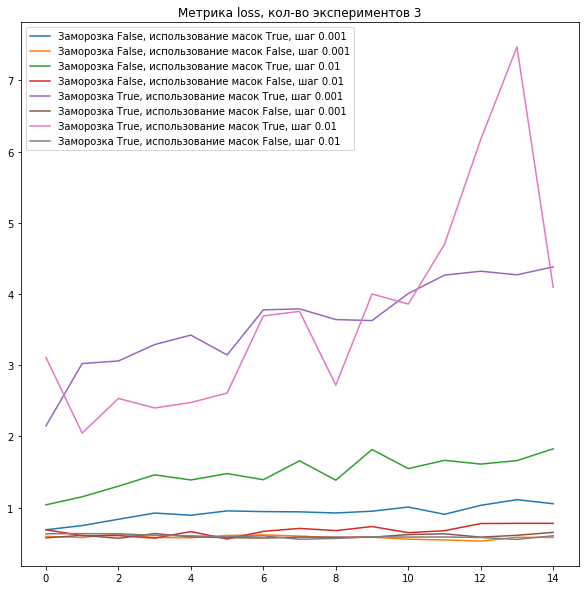

In [75]:
plot_graph_metric(file, metric=['loss'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


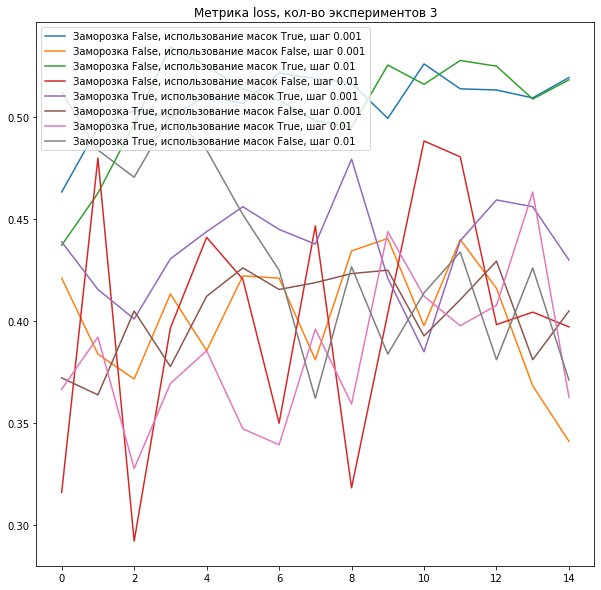

In [76]:
plot_graph_metric(file, metric=['recall'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


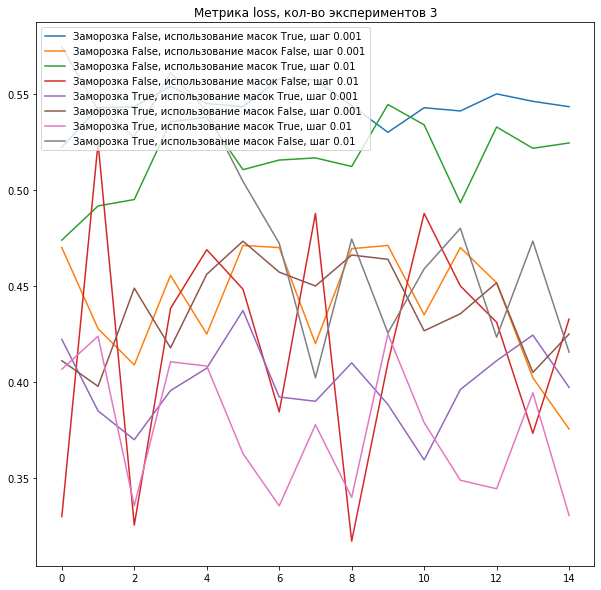

In [77]:
plot_graph_metric(file, metric=['prec'])

In [99]:
def plot_graph_metric_spec(data, train_mode='valid', metric=['loss', 'prec', 'recall']):
    plt.figure(figsize=(10,10))
    legend = []
    for fr in np.unique(data.freeze_mode):
        for l in np.unique(data.lr):
            temp_data = data[data['freeze_mode']==fr][data['lr']==l][data['train_mode']==train_mode]
            mask_data = temp_data.iloc[:temp_data.shape[0]//2, :]
            non_mask_data = temp_data.iloc[temp_data.shape[0]//2:, :]
            for i, d in enumerate([mask_data, non_mask_data]):
                legend.append('Заморозка {}, использование масок {}, шаг {}'.format(fr, mask_use[i], l))
                for m in metric:
                    mean_value = np.array([np.mean(d[d['epoch']==ep][m]) for ep in np.unique(d.epoch)])
                    if i == 0:
                        if fr == True:
                            col = 'C1'
                        else:
                            col = 'C2'
                    elif fr == True:
                        col = 'C3'
                    else:
                        col = 'C6'
                    plt.plot(mean_value, color=col)
    plt.legend(legend,loc='upper left')
    plt.title('Метрика {}, кол-во экспериментов {}'.format(metric, len(np.unique(data['exp']))))

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


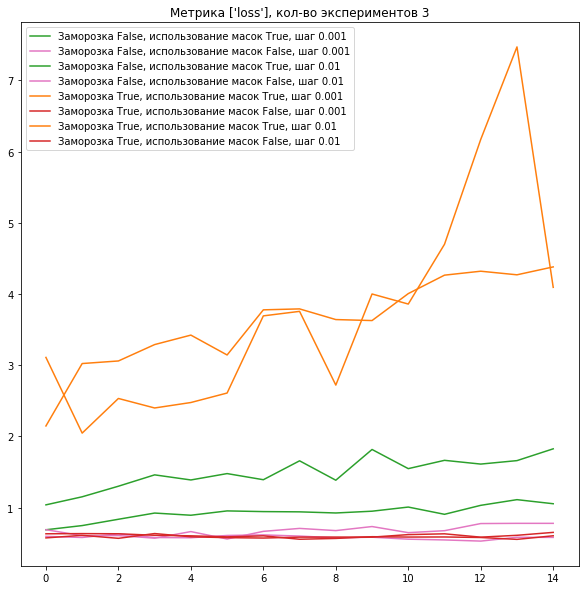

In [100]:
plot_graph_metric_spec(file, metric=['loss'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


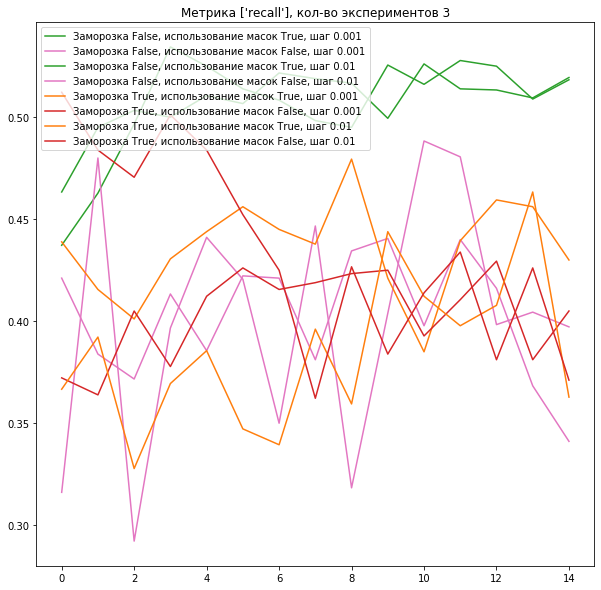

In [101]:
plot_graph_metric_spec(file, metric=['recall'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


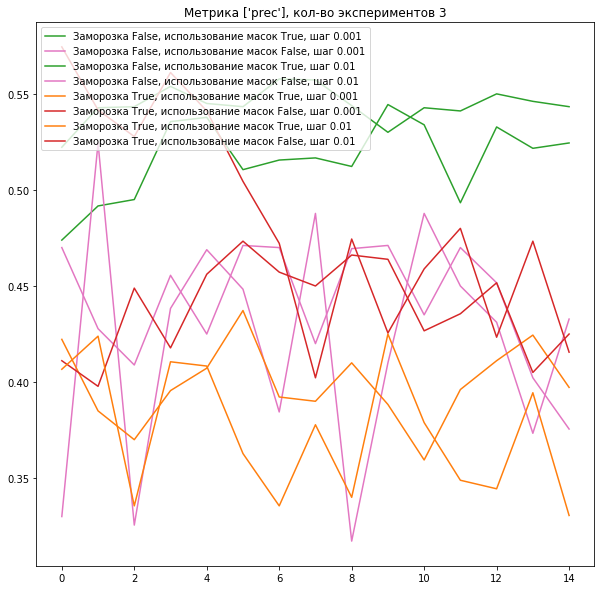

In [103]:
plot_graph_metric_spec(file, metric=['prec'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


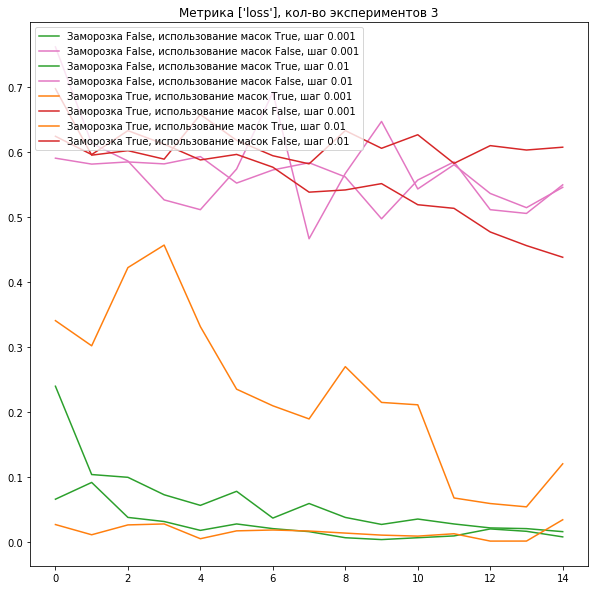

In [105]:
plot_graph_metric_spec(file, train_mode='train', metric=['loss'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


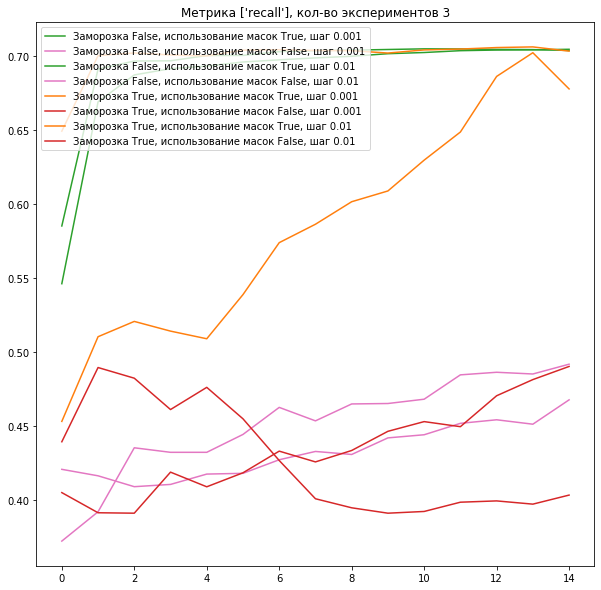

In [106]:
plot_graph_metric_spec(file, train_mode='train', metric=['recall'])

/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/oem/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


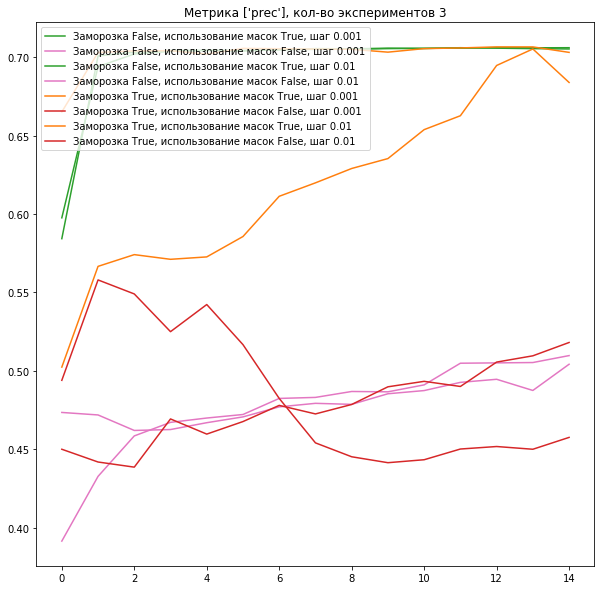

In [107]:
plot_graph_metric_spec(file, train_mode='train', metric=['prec'])

# Big exp

In [4]:
path = '../Results/results_1/'
name = 'resnet_all_res.csv'
file = pd.read_csv(os.path.join(path, name), sep=',')
file.head()

,freeze_mode,lr,exp,train_mode,epoch,loss,prec,recall
0,False,0.01,0,train,0,0.056496,0.580427,0.597428
1,False,0.01,0,valid,0,1.045165,0.550000,0.508333
2,False,0.01,0,train,1,0.147512,0.702267,0.693330
3,False,0.01,0,valid,1,0.875733,0.415000,0.403333
4,False,0.01,0,train,2,0.016722,0.703357,0.697254


In [5]:
file.shape

(720, 8)